#<font color='#97171e'>AIT - Master in Data Science</font> 📈
# **Module 8: Class 1-Exercises**

In the following sections we'll use a dataset from 2013 that has information about students from a Statistics slass of [Bratislava Comenius University](https://fses.uniba.sk/en/) and their friends.

The file **responses.csv** has 1010 rows and 150 columns (139 numerical and 11 categorical). There are missing values.

To ease the job, the original variable names were changed. The original names are stored in **columns.csv**.

The original answers were in Slovak but they were translated to English.

The surveyed people were from Slovakia and they were between 15 and 30 years old.

More details can be found in the following [document](https://docs.google.com/document/d/1YI94OKNvQSRY6oiocuUVjVWLP8r9N1wc1DiqHqcHEEY/edit?usp=sharing).

## <a id="location"><font color='#97171e'>**Exercise 1**</font></a>

Replace the missing values in 'Weight' column considering the symmetry and outliers to choose suitable values for the replacement.

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
responses = pd.read_csv('Files/responses.csv')

In [2]:
def check_symmetry(df, column):
  """
  It prints if the column of the dataframe df is symmetric or
  positive/negative skewed.

  Parameters
  ----------
  df: DataFrame
  column: string
  """
  df = df[[column]]
  q1=df.quantile(0.25)
  q2=df.quantile(0.5)
  q3=df.quantile(0.75)
  q3_q2 = float(q3-q2)
  q2_q1 = float(q2-q1)
  difference = q3_q2 - q2_q1

  if q3_q2 > q2_q1:
    print('Data from the column is positive skewed and the difference is',
          difference)
  elif q3_q2 < q2_q1:
    print('Data from the column is negative skewed and the difference is',
          difference)
  else:
    print('Data from the column is symmetric')

In [3]:
def check_outliers(df, cols, store=False):
    """
    La función toma un dataframe, una lista de columnas y un booleano store.
    Si store=False, solo imprime la cantidad de outliers que hay en cada columna de la lista.
    Si store=True, devuelve un diccionario que tiene como claves los nombres de las
    columnas y como valores los outliers de cada una de ellas.

    Parameters
    ----------
    df: Dataframe
    cols: list
    store: bool

    Returns
    -------
    Si store=True:
        dict_outliers: dict
    """
    dict_outliers=dict()
    for cat in cols:
        df_cat = df[cat]
        Q1 = df_cat.quantile(0.25) # 1er cuartil
        Q3 = df_cat.quantile(0.75)# 2do cuartil
        IQR = Q3-Q1 # interquartile range
        outlier_step = IQR * 1.5
        outliers = df_cat[~((df_cat >= Q1 - outlier_step) & (df_cat <= Q3 + outlier_step))].index.tolist()
        dict_outliers[cat]=outliers
        if not store:
            print('Para la variable {} hay {} outliers'.format(cat, len(outliers)))
    if store:
        return dict_outliers

In [4]:
check_symmetry(responses, 'Weight')

Data from the column is positive skewed and the difference is 2.0


In [5]:
check_outliers(responses, cols=['Weight'])

Para la variable Weight hay 29 outliers


Dado que no es simétrica y tiene outliers vamos a reemplazar los missing values por la mediana.

In [6]:
median = responses['Weight'].median()
responses['Weight'] = responses['Weight'].fillna(median)

## <a id="location"><font color='#97171e'>**Exercise 2**</font></a>

In each case make a suitable graph.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualization to show the amount of siblings, detecting outliers.

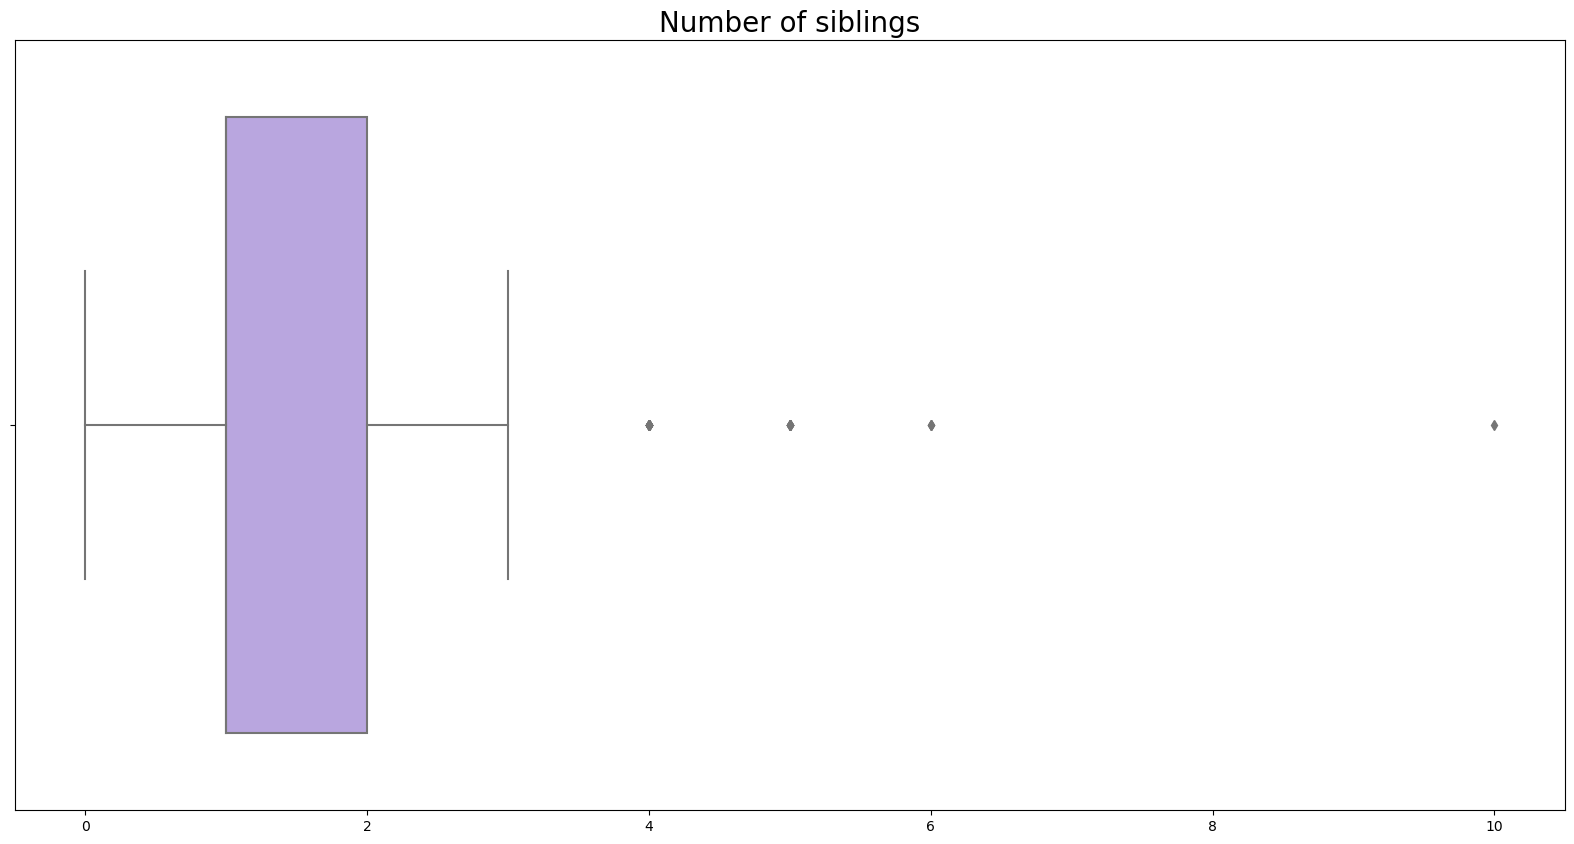

In [8]:
siblings=responses[['Number of siblings']]
# Opcional: elegir qué color queremos usar
color = '#B69DE8'
# Definimos una figura y le pasamos el tamaño
fig = plt.figure(figsize=(20, 10))
# Creamos el boxplot
sns.boxplot(data=siblings, x="Number of siblings", whis=1.5, color=color)
plt.title('Number of siblings',  fontsize=20) # Título, Tamaño título
plt.xlabel('') # Leyenda eje x
plt.ylabel('') # Leyenda eje y
plt.show()


### Visualization to show the distribution of the heights.

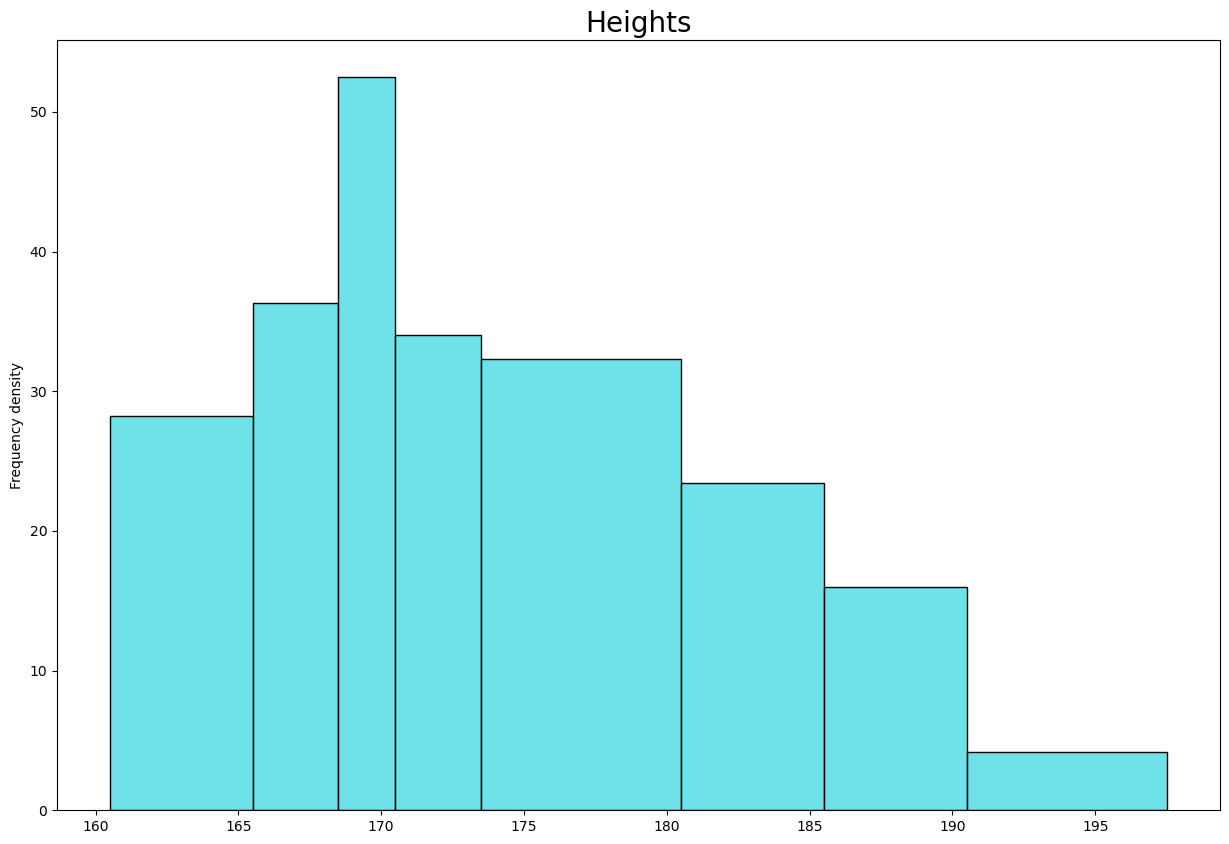

In [9]:
height=responses[['Height']]
# Definimos los intervalos
bins=[160.5, 165.5, 168.5, 170.5, 173.5, 180.5, 185.5, 190.5, 197.5]
# Opcional: elegir qué color queremos usar
color = '#3ED8E2'
# Definimos una figura y le pasamos el tamaño
fig = plt.figure(figsize=(15, 10))
# Creamos el histograma
# stat= 'frequency' para que en el eje y esté la frequency density
sns.histplot(data=height, x="Height", bins=bins, stat='frequency', color=color)
plt.title('Heights',  fontsize=20) # Título, Tamaño título
plt.xlabel('') # Leyenda eje x
plt.ylabel('Frequency density') # Leyenda eje y
plt.show()

### Visualization that shows the relationship between height and weight

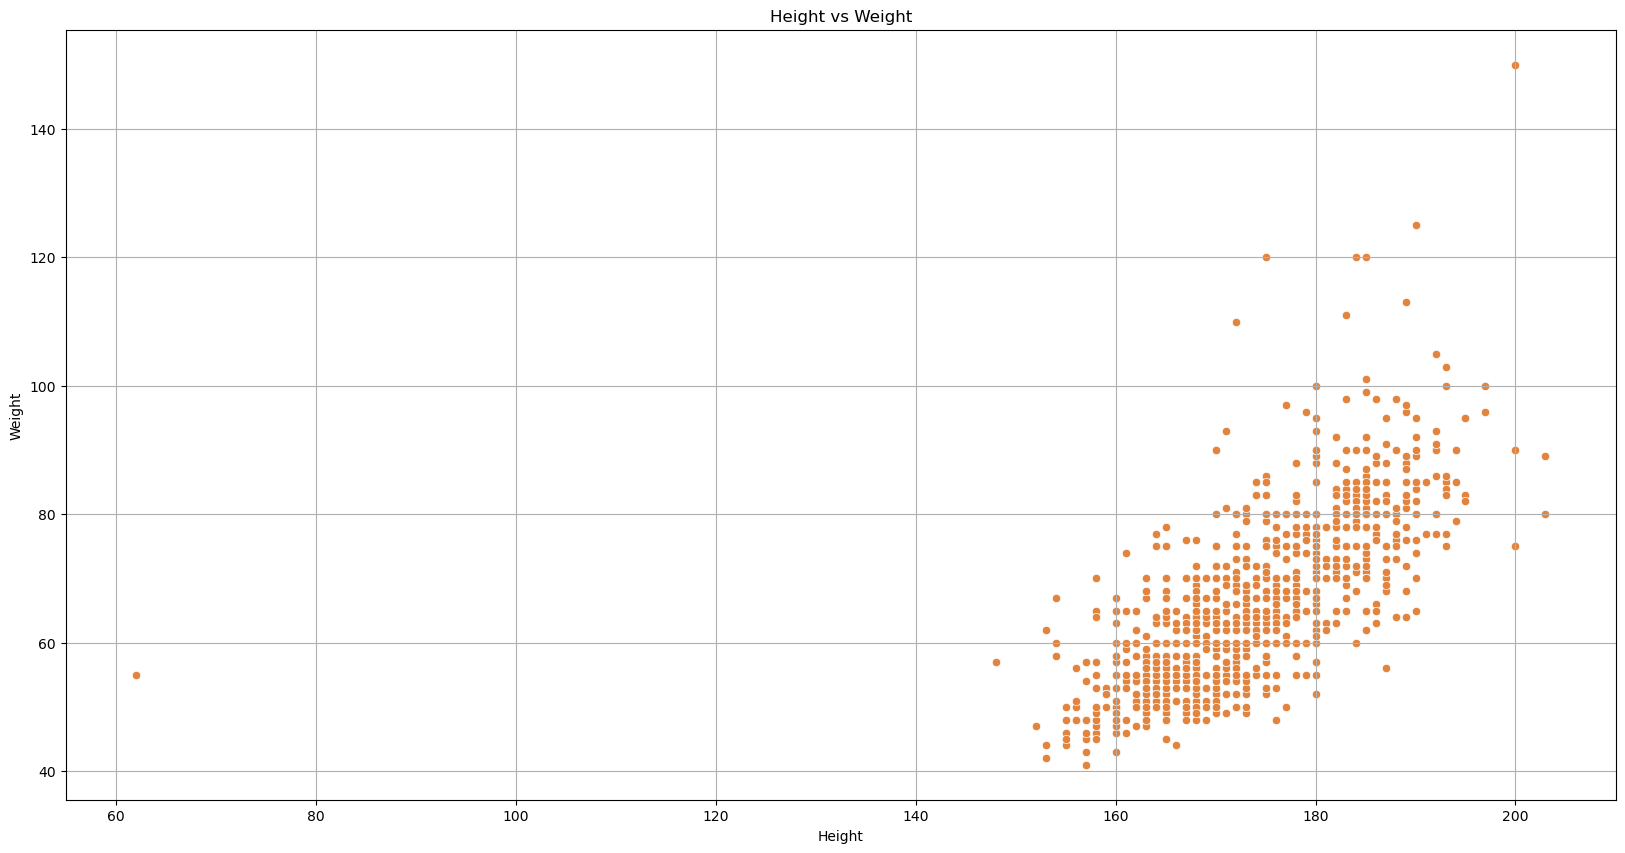

In [10]:
color='#E2843E'
fig = plt.figure(figsize=(20, 10))
sns.scatterplot(data=responses, x='Height', y='Weight', color=color)
plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid()
plt.show()

### Visualization that shows the amount of people of each age

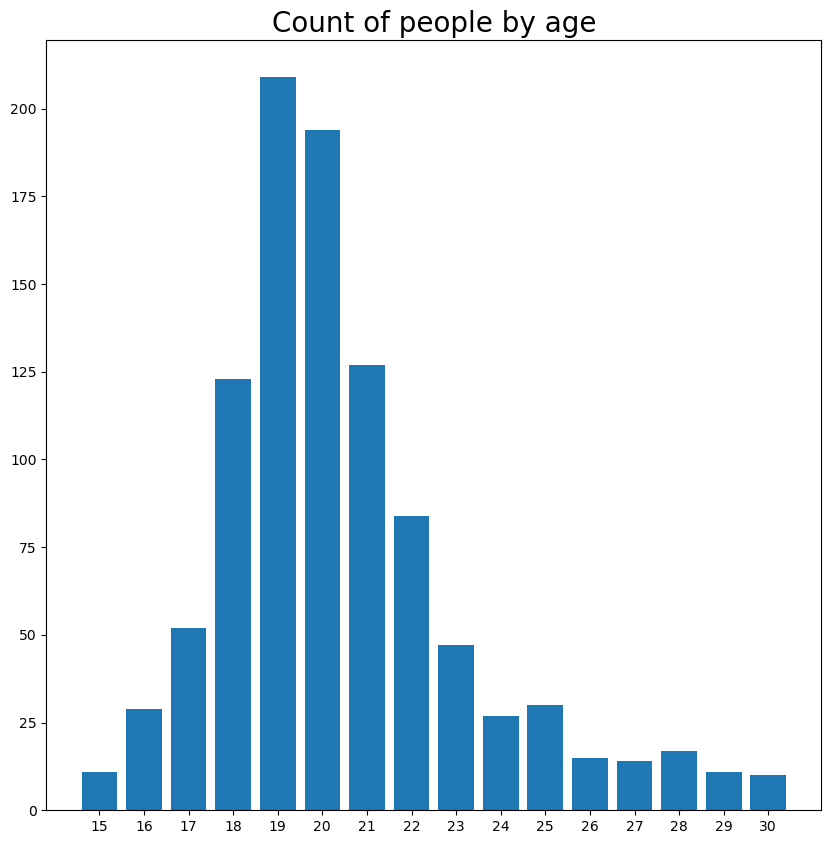

In [11]:
agrupado=responses.groupby('Age').count()
agrupado.rename(columns={'Music': 'Count'}, inplace=True)
agrupado.reset_index(inplace=True)
agrupado = agrupado[['Age', 'Count']]
fig = plt.figure(figsize=(10, 10)) # Definimos una figura y le pasamos el tamaño
plt.bar(agrupado['Age'], agrupado['Count'],width=0.8) # Creamos el gráfico de barras
plt.title('Count of people by age',  fontsize=20) # Título, Tamaño título
plt.xticks(list(agrupado.Age.unique()))
plt.show() # Mostramos el gráfico